## 第56课 CNN应用Keras Tuner寻找最佳Hidden Layers层数和神经元数量

Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


#### Hyperparameters
1. How many number of hidden layers we should have?
2. How many number of neurons we should have in hidden layers?
3. Learning Rate 

In [49]:
#https://keras-team.github.io/keras-tuner/

#conda create –n myenv python=3.7.6
#conda activate myenv
#pip install -U keras-tuner
#conda install tensorflow==2.3

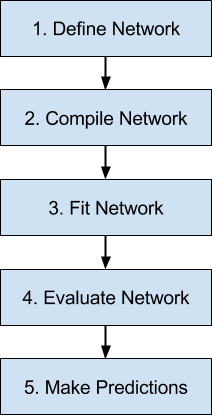

In [2]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson56-Step-.png')

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
'''
Label   Description
0   T-shirt/top
1   Trouser
2   Pullover
3   Dress
4   Coat
5   Sandal
6   Shirt
7   Sneaker
8   Bag
9   Ankle boot
'''

'\nLabel   Description\n0   T-shirt/top\n1   Trouser\n2   Pullover\n3   Dress\n4   Coat\n5   Sandal\n6   Shirt\n7   Sneaker\n8   Bag\n9   Ankle boot\n'

2


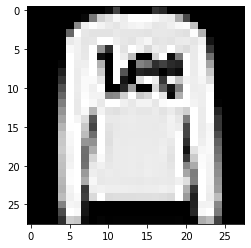

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

print(y_test[1])
plt.imshow(x_test[1], cmap="gray") 
#each having 1 channel (grayscale, it would have been 3 in the case of color, 1 each for Red, Green and Blue)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1) 

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28, 1)

In [9]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation

model = keras.models.Sequential()

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data = (x_test, y_test))

938/938 [==============================] - 53s 57ms/step - loss: 0.9438 - accuracy: 0.7726 - val_loss: 0.4749 - val_accuracy: 0.8261


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)              

In [11]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [12]:
def build_model(hp):  # random search passes this hyperparameter() object 
    model = keras.models.Sequential()

    model.add(Conv2D(hp.Int('input_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3), input_shape=x_train.shape[1:]))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers.
        model.add(Conv2D(hp.Int(f'conv_{i}_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3)))
        model.add(Activation('relu'))

    model.add(Flatten()) 
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    return model

In [13]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # how many model variations to test?
    executions_per_trial=1,  # how many trials per variation? (same model could perform differently)
    directory='Lesson56',
    project_name='Optimise')

In [14]:
tuner.search(x=x_train,
             y=y_train,
             verbose=1, # just slapping this here bc jupyter notebook. The console out was getting messy.
             epochs=1,
             batch_size=64,
             #callbacks=[tensorboard],  # if you have callbacks like tensorboard, they go here.
             validation_data=(x_test, y_test))

Trial 1 Complete [00h 12m 59s]
val_accuracy: 0.8580999970436096

Best val_accuracy So Far: 0.8580999970436096
Total elapsed time: 00h 12m 59s
INFO:tensorflow:Oracle triggered exit


In [67]:
tuner.results_summary()

Results summary
Results in Lesson56\Optimise
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 192
n_layers: 1
conv_0_units: 96
Score: 0.8763999938964844
Trial summary
Hyperparameters:
input_units: 96
n_layers: 4
conv_0_units: 256
conv_1_units: 32
conv_2_units: 32
conv_3_units: 32
Score: 0.8758999705314636
